In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\Home\\Desktop\\Saptha\\Machine-Learning\\American_Express_Techgig")

In [3]:
# Invoke garbage collector in python
import gc 

In [4]:
# Importing input Datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              590 non-null object
Age               590 non-null object
Debt              590 non-null float64
Married           590 non-null object
BankCustomer      590 non-null object
EducationLevel    590 non-null object
Ethnicity         590 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           590 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [6]:
# Finding Columns with missing values.

print (train.Male.value_counts())
print (train.Age.value_counts())
print (train.Debt.value_counts()) # No NULL values
print (train.Married.value_counts())
print (train.BankCustomer.value_counts())
print (train.EducationLevel.value_counts())
print (train.Ethnicity.value_counts())
print (train.YearsEmployed.value_counts()) # No NULL values
print (train.PriorDefault.value_counts()) # No NULL values
print (train.Employed.value_counts()) # No NULL values
print (train.CreditScore.value_counts()) # No NULL values
print (train.DriversLicense.value_counts()) # No NULL values
print (train.Citizen.value_counts()) # No NULL values
print (train.ZipCode.value_counts())
print (train.Income.value_counts()) # No NULL values
print (train.Approved.value_counts()) # No NULL values

b    400
a    179
?     11
Name: Male, dtype: int64
?        12
22.67     8
20.42     6
18.83     6
23.58     6
22.5      6
20.67     6
24.5      5
25        5
23.08     5
19.17     5
27.67     5
24.75     4
23.5      4
24.58     4
28.58     4
32.33     4
20        4
23        4
26.17     4
25.17     4
33.17     4
21.92     3
20.83     3
27.58     3
19.67     3
18.58     3
20.75     3
29.58     3
18.17     3
         ..
24.17     1
41        1
44.83     1
48.08     1
26.58     1
33        1
51.92     1
47.83     1
26.5      1
56.83     1
25.92     1
32.17     1
63.33     1
15.83     1
17.5      1
51.42     1
26.25     1
30.75     1
38.17     1
50.75     1
34.58     1
16.17     1
15.75     1
52.5      1
30.42     1
38.67     1
59.5      1
52.83     1
17.83     1
29.75     1
Name: Age, Length: 322, dtype: int64
1.500     20
2.500     17
0.000     17
3.000     17
1.250     15
5.000     14
0.750     14
1.750     12
4.000     11
0.500     10
10.000    10
11.000     9
2.000      9
6.500     

In [7]:
train.replace({'Age':{'?' :0}}, inplace=True)
train.Age = np.float32(train.Age)

In [8]:
train.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,30.622503,4.609390,2.088534,2.045763,918.706780
std,170.462606,12.684757,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,22.170000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,27.710000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,37.290001,7.000000,2.500000,2.000000,363.000000
max,590.000000,80.250000,26.335000,20.000000,20.000000,100000.000000


In [9]:
# Imputing by mean vs median
print (np.mean(train.Age))
print (np.median(train.Age))

30.62250328063965
27.71


AxesSubplot(0.125,0.125;0.775x0.755)


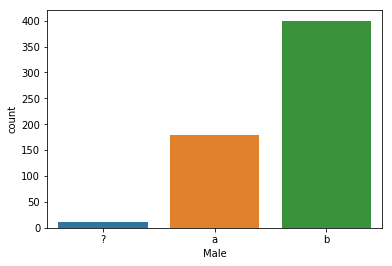

In [10]:
# Distribution of categorical variables before imputation
# we need to ensure that the distribution of the feature before and after imputation remained the same.

import seaborn as sns
print (sns.countplot(x="Male", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


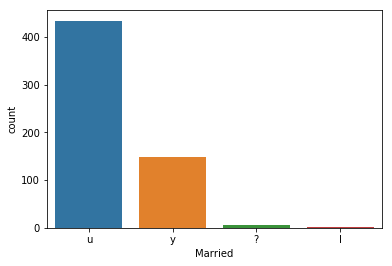

In [11]:
print (sns.countplot(x="Married", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


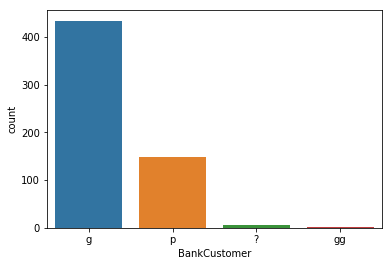

In [12]:
print (sns.countplot(x="BankCustomer", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


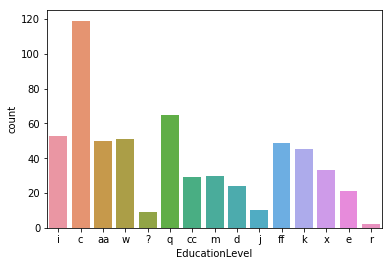

In [13]:
print (sns.countplot(x="EducationLevel", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


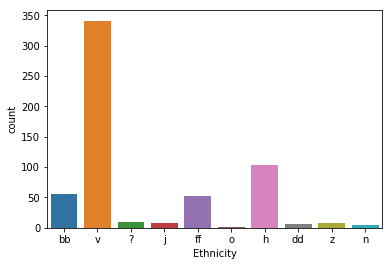

In [14]:
print (sns.countplot(x="Ethnicity", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


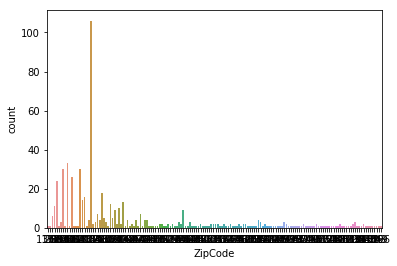

In [15]:
print (sns.countplot(x="ZipCode", data=train))

In [16]:
# Handling missing values & categorical data encoding.

# Replacing by mean
train.replace({'Age':{0 :round(np.mean(train.Age))}}, inplace=True) 

# Replacing by mode
train.replace({'Male':{'?' :'b'}}, inplace=True) 
train.replace({'Married':{'?' :'u'}}, inplace=True) 
train.replace({'BankCustomer':{'?' :'g'}}, inplace=True) 
train.replace({'EducationLevel':{'?' :'c'}}, inplace=True) 
train.replace({'Ethnicity':{'?' :'v'}}, inplace=True) 
train.replace({'ZipCode':{'?' :'0'}}, inplace=True) 

# Encoding true, false as 1,0 respectively --> Nominal categorical variables with just two categories.
train.replace({'PriorDefault':{'t' :1,'f' :0}}, inplace=True) 
train.replace({'Employed':{'t' :1, 'f' :0}}, inplace=True) 
train.replace({'DriversLicense':{'t' :1, 'f' :0}}, inplace=True) 
train.replace({'Approved':{'+' :1, '-' :0}}, inplace=True) 



AxesSubplot(0.125,0.125;0.775x0.755)


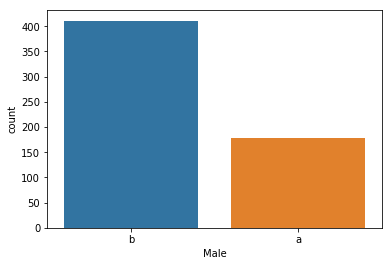

In [17]:
# Distribution of categorical variables after imputation
print (sns.countplot(x="Male", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


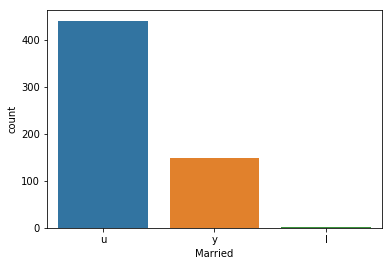

In [18]:
print (sns.countplot(x="Married", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


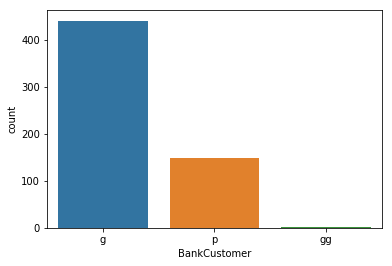

In [19]:
print (sns.countplot(x="BankCustomer", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


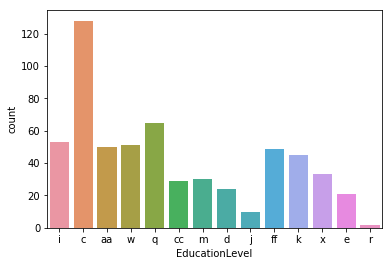

In [20]:
print (sns.countplot(x="EducationLevel", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


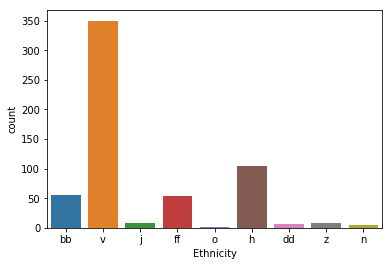

In [21]:
print (sns.countplot(x="Ethnicity", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


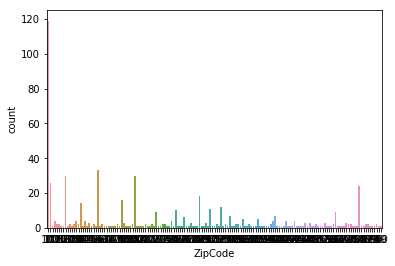

In [22]:
print (sns.countplot(x="ZipCode", data=train))

In [23]:
# Doing everything for test data

test.Age = np.float32(test.Age)

# Handling missing values & categorical data encoding.

# Replacing by mode
test.replace({'Male':{'?' :'b'}}, inplace=True) 
test.replace({'Married':{'?' :'u'}}, inplace=True) 
test.replace({'BankCustomer':{'?' :'g'}}, inplace=True) 
test.replace({'EducationLevel':{'?' :'c'}}, inplace=True) 
test.replace({'Ethnicity':{'?' :'v'}}, inplace=True) 

# Encoding true, false as 1,0 respectively --> Binary categorical variables.
test.replace({'PriorDefault':{'t' :1,'f' :0}}, inplace=True) 
test.replace({'Employed':{'t' :1, 'f' :0}}, inplace=True) 
test.replace({'DriversLicense':{'t' :1, 'f' :0}}, inplace=True) 


# Model Building

In [24]:
# For ensemble classifier.
# Maximum vote technique.
# Base classifiers used - Logistic Regression, Random Forest, Extreme Gradient Boosting.

ensemble = pd.DataFrame()

In [25]:
modelTrain = train.copy(deep = True) # Deep copy so that changes in modelTrain are not reflected in train
modelTest = test.copy(deep = True)

In [26]:
# Deleting columns which are not meaningful for model building.
del modelTrain['Key']
del modelTrain['ZipCode']
del modelTest['ZipCode']

# Removing categorical outliers
modelTrain = modelTrain[modelTrain.Married != 'l'] 
modelTrain = modelTrain[modelTrain.Citizen != 'p']

In [27]:
# Dummy encoding nominal categorical variables for linear models.

modelTrain_Male = modelTrain['Male']
modelTrain = pd.get_dummies(modelTrain, columns=['Male'], prefix = ['m'])
modelTrain['Male'] = modelTrain_Male

modelTrain_Married = modelTrain['Married']
modelTrain = pd.get_dummies(modelTrain, columns=['Married'], prefix = ['md'])
modelTrain['Married'] = modelTrain_Married

modelTrain_BankCustomer = modelTrain['BankCustomer']
modelTrain = pd.get_dummies(modelTrain, columns=['BankCustomer'], prefix = ['bc'])
modelTrain['BankCustomer'] = modelTrain_BankCustomer

modelTrain_EducationLevel = modelTrain['EducationLevel']
modelTrain = pd.get_dummies(modelTrain, columns=['EducationLevel'], prefix = ['el'])
modelTrain['EducationLevel'] = modelTrain_EducationLevel

modelTrain_Citizen = modelTrain['Citizen']
modelTrain = pd.get_dummies(modelTrain, columns=['Citizen'], prefix = ['ct'])
modelTrain['Citizen'] = modelTrain_Citizen

# Creating feature bins
# These feature bins didn't significantly increase AUC. So they were commented out while trying chiSq test and Age was used as 
# continuous feature itself.
# modelTrain['Age'] = round(modelTrain['Age'])
# modelTrain['agebins'] = pd.cut(modelTrain['Age'], [0,20,40,60,80], labels = ["[0,20]","[20,40]","[40,60]","[60,80]"])
# modelTrain_Age = modelTrain['Age']
# modelTrain = pd.get_dummies(modelTrain, columns=['agebins'], prefix = ['ag'])
# modelTrain['Age'] = modelTrain_Age

modelTrain_Male = modelTest['Male']
modelTest = pd.get_dummies(modelTest, columns=['Male'], prefix = ['m'])
modelTest['Male'] = modelTrain_Male

modelTrain_Married = modelTest['Married']
modelTest = pd.get_dummies(modelTest, columns=['Married'], prefix = ['md'])
modelTest['Married'] = modelTrain_Married

modelTrain_BankCustomer = modelTest['BankCustomer']
modelTest = pd.get_dummies(modelTest, columns=['BankCustomer'], prefix = ['bc'])
modelTest['BankCustomer'] = modelTrain_BankCustomer

modelTrain_EducationLevel = modelTest['EducationLevel']
modelTest = pd.get_dummies(modelTest, columns=['EducationLevel'], prefix = ['el'])
modelTest['EducationLevel'] = modelTrain_EducationLevel

modelTrain_Citizen = modelTest['Citizen']
modelTest = pd.get_dummies(modelTest, columns=['Citizen'], prefix = ['ct'])
modelTest['Citizen'] = modelTrain_Citizen

# Creating feature bins
# These feature bins didn't significantly increase AUC. So they were commented out while trying chiSq test and Age was used as 
# continuous feature itself.
# modelTest['Age'] = round(modelTest['Age'])
# modelTest['agebins'] = pd.cut(modelTest['Age'], [0,20,40,60,80], labels = ["[0,20]","[20,40]","[40,60]","[60,80]"])
# modelTrain_Age = modelTest['Age']
# modelTest = pd.get_dummies(modelTest, columns=['agebins'], prefix = ['ag'])
# modelTest['Age'] = modelTrain_Age

# modelTest['el_j'] = 0



In [28]:
# Mean encoding nominal categorical data for Tree based models, as Tree based models would suffer from one hot encoded features.

et_mean_encode = modelTrain.groupby('Ethnicity')['Approved'].mean()
modelTrain.loc[:,'EthnicityMeanEncoded'] = modelTrain['Ethnicity'].map(et_mean_encode)
modelTest.loc[:,'EthnicityMeanEncoded'] = modelTest['Ethnicity'].map(et_mean_encode)

m_mean_encode = modelTrain.groupby('Male')['Approved'].mean()
modelTrain.loc[:,'MaleMeanEncoded'] = modelTrain['Male'].map(m_mean_encode)
modelTest.loc[:,'MaleMeanEncoded'] = modelTest['Male'].map(m_mean_encode)

md_mean_encode = modelTrain.groupby('Married')['Approved'].mean()
modelTrain.loc[:,'MarriedMeanEncoded'] = modelTrain['Married'].map(md_mean_encode)
modelTest.loc[:,'MarriedMeanEncoded'] = modelTest['Married'].map(md_mean_encode)

bc_mean_encode = modelTrain.groupby('BankCustomer')['Approved'].mean()
modelTrain.loc[:,'BankCustomerMeanEncoded'] = modelTrain['BankCustomer'].map(bc_mean_encode)
modelTest.loc[:,'BankCustomerMeanEncoded'] = modelTest['BankCustomer'].map(bc_mean_encode)

el_mean_encode = modelTrain.groupby('EducationLevel')['Approved'].mean()
modelTrain.loc[:,'EducationLevelMeanEncoded'] = modelTrain['EducationLevel'].map(el_mean_encode)
modelTest.loc[:,'EducationLevelMeanEncoded'] = modelTest['EducationLevel'].map(el_mean_encode)

ct_mean_encode = modelTrain.groupby('Citizen')['Approved'].mean()
modelTrain.loc[:,'CitizenMeanEncoded'] = modelTrain['Citizen'].map(ct_mean_encode)
modelTest.loc[:,'CitizenMeanEncoded'] = modelTest['Citizen'].map(ct_mean_encode)

In [29]:
# splitting train & test data.
from sklearn.model_selection import train_test_split

Y = modelTrain['Approved']
X = modelTrain

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
# Mean encoding nominal categorical variables for non-linear models.

'''
As Mean Encoding is now done based on X_train, instead of entire train data.
X_train & X_test is made out of actual train for model building & cross validation.
'''

et_mean_encode = X_train.groupby('Ethnicity')['Approved'].mean()
X_train.loc[:,'EthnicityMeanTrain'] = X_train['Ethnicity'].map(et_mean_encode)
X_test.loc[:,'EthnicityMeanTrain'] = X_test['Ethnicity'].map(et_mean_encode)

m_mean_encode = X_train.groupby('Male')['Approved'].mean()
X_train.loc[:,'MaleMeanTrain'] = X_train['Male'].map(m_mean_encode)
X_test.loc[:,'MaleMeanTrain'] = X_test['Male'].map(m_mean_encode)

md_mean_encode = X_train.groupby('Married')['Approved'].mean()
X_train.loc[:,'MarriedMeanTrain'] = X_train['Married'].map(md_mean_encode)
X_test.loc[:,'MarriedMeanTrain'] = X_test['Married'].map(md_mean_encode)

bc_mean_encode = X_train.groupby('BankCustomer')['Approved'].mean()
X_train.loc[:,'BankCustomerMeanTrain'] = X_train['BankCustomer'].map(bc_mean_encode)
X_test.loc[:,'BankCustomerMeanTrain'] = X_test['BankCustomer'].map(bc_mean_encode)

el_mean_encode = X_train.groupby('EducationLevel')['Approved'].mean()
X_train.loc[:,'EducationLevelMeanTrain'] = X_train['EducationLevel'].map(el_mean_encode)
X_test.loc[:,'EducationLevelMeanTrain'] = X_test['EducationLevel'].map(el_mean_encode)

ct_mean_encode = X_train.groupby('Citizen')['Approved'].mean()
X_train.loc[:,'CitizenMeanTrain'] = X_train['Citizen'].map(ct_mean_encode)
X_test.loc[:,'CitizenMeanTrain'] = X_test['Citizen'].map(ct_mean_encode)

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
X_train.columns

Index(['Age', 'Debt', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed',
       'CreditScore', 'DriversLicense', 'Income', 'Approved', 'm_a', 'm_b',
       'Male', 'md_u', 'md_y', 'Married', 'bc_g', 'bc_p', 'BankCustomer',
       'el_aa', 'el_c', 'el_cc', 'el_d', 'el_e', 'el_ff', 'el_i', 'el_j',
       'el_k', 'el_m', 'el_q', 'el_r', 'el_w', 'el_x', 'EducationLevel',
       'ct_g', 'ct_s', 'Citizen', 'EthnicityMeanEncoded', 'MaleMeanEncoded',
       'MarriedMeanEncoded', 'BankCustomerMeanEncoded',
       'EducationLevelMeanEncoded', 'CitizenMeanEncoded', 'EthnicityMeanTrain',
       'MaleMeanTrain', 'MarriedMeanTrain', 'BankCustomerMeanTrain',
       'EducationLevelMeanTrain', 'CitizenMeanTrain'],
      dtype='object')

# Logistic Regression

In [32]:
# Logistic Regression model fitting.
# Building a basic logistic regression model without any feature selection.

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logRegCols = ['Age', 'Debt', 'EthnicityMeanTrain', 'YearsEmployed', 'PriorDefault', 'Employed','CreditScore', 'DriversLicense', 
              'Income', 'm_a', 'm_b', 'md_u', 'md_y', 'bc_g', 'bc_p', 'el_aa', 'el_c', 'el_cc', 'el_d', 'el_e', 'el_ff', 'el_i', 
              'el_j','el_k', 'el_m', 'el_q', 'el_r', 'el_w', 'el_x', 'ct_g', 'ct_s']

print (X_train[logRegCols].head())
print (X_test[logRegCols].head())

logreg = LogisticRegression()
logreg.fit(X_train[logRegCols], y_train)
y_pred_test = logreg.predict(X_test[logRegCols])
y_pred_train = logreg.predict(X_train[logRegCols])

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

print ('Test')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[logRegCols], y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))
print (X_train.columns)
print ('Model Coefficients')
print (logreg.coef_)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

           Age   Debt  EthnicityMeanTrain  YearsEmployed  PriorDefault  \
296  34.669998  1.080            0.367647          1.165             0   
388  37.330002  6.500            0.581395          4.250             1   
78   23.000000  1.835            0.600000          0.000             0   
212  39.419998  1.710            0.367647          0.165             0   
557  21.000000  3.000            0.367647          1.085             1   

     Employed  CreditScore  DriversLicense  Income  m_a  ...   el_i  el_j  \
296         0            0               0       0    0  ...      0     0   
388         1           12               1       0    0  ...      0     0   
78          1            1               0      53    1  ...      0     1   
212         0            0               0       0    0  ...      0     0   
557         1            8               1       1    0  ...      0     0   

     el_k  el_m  el_q  el_r  el_w  el_x  ct_g  ct_s  
296     0     1     0     0     0     

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Feature Selection + Logistic Regression

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.01):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [34]:
# Building model after selecting features using chi square test

catCols = ['EthnicityMeanTrain', 'PriorDefault', 'Employed','CreditScore', 'DriversLicense', 'm_a', 'm_b', 'md_u', 'md_y', 'bc_g',
           'bc_p', 'el_aa', 'el_c', 'el_cc', 'el_d', 'el_e', 'el_ff', 'el_i', 'el_j','el_k', 'el_m', 'el_q', 'el_r', 'el_w',
           'el_x', 'ct_g', 'ct_s','Approved']

# Initialize ChiSquare Class
print (X_train[catCols].head())
cT = ChiSquare(X_train[catCols])

for var in catCols:
    cT.TestIndependence(colX=var,colY="Approved")  

     EthnicityMeanTrain  PriorDefault  Employed  CreditScore  DriversLicense  \
296            0.367647             0         0            0               0   
388            0.581395             1         1           12               1   
78             0.600000             0         1            1               0   
212            0.367647             0         0            0               0   
557            0.367647             1         1            8               1   

     m_a  m_b  md_u  md_y  bc_g    ...     el_j  el_k  el_m  el_q  el_r  el_w  \
296    0    1     1     0     1    ...        0     0     1     0     0     0   
388    0    1     1     0     1    ...        0     0     1     0     0     0   
78     1    0     1     0     1    ...        1     0     0     0     0     0   
212    0    1     0     1     0    ...        0     0     1     0     0     0   
557    0    1     0     1     0    ...        0     0     0     0     0     0   

     el_x  ct_g  ct_s  Approved 

In [35]:
# choosing best features.

logRegBestCols = ['Age', 'Debt', 'EthnicityMeanTrain', 'YearsEmployed', 'PriorDefault', 'Employed','CreditScore', 'Income', 
             'md_u', 'md_y', 'bc_g', 'bc_p', 'el_ff', 'el_i', 'el_q', 'el_x']

# Logistic Regression model fitting.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression()
logreg.fit(X_train[logRegBestCols], y_train)
y_pred_test = logreg.predict(X_test[logRegBestCols])
y_pred_train = logreg.predict(X_train[logRegBestCols])

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[logRegBestCols], y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))
print (X_train.columns)
print ('Model Coefficients')
print (logreg.coef_)

print ('Test')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

Train
0.8784820031298906
[0.         0.09859155 1.        ]
[0.         0.85555556 1.        ]
Accuracy of logistic regression classifier on test set: 0.90
[[63  8]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.84      0.91      0.87        46

    accuracy                           0.90       117
   macro avg       0.89      0.90      0.89       117
weighted avg       0.90      0.90      0.90       117

Index(['Age', 'Debt', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed',
       'CreditScore', 'DriversLicense', 'Income', 'Approved', 'm_a', 'm_b',
       'Male', 'md_u', 'md_y', 'Married', 'bc_g', 'bc_p', 'BankCustomer',
       'el_aa', 'el_c', 'el_cc', 'el_d', 'el_e', 'el_ff', 'el_i', 'el_j',
       'el_k', 'el_m', 'el_q', 'el_r', 'el_w', 'el_x', 'EducationLevel',
       'ct_g', 'ct_s', 'Citizen', 'EthnicityMeanEncoded', 'MaleMeanEncoded',
       'MarriedMeanEncoded', 'BankCustomerMe

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#Actual model building for submission
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Y = modelTrain['Approved']
X = modelTrain

logRegBestCols = ['Age', 'Debt', 'EthnicityMeanEncoded', 'YearsEmployed', 'PriorDefault', 'Employed','CreditScore', 'Income', 
             'md_u', 'md_y', 'bc_g', 'bc_p', 'el_ff', 'el_i', 'el_q', 'el_x']

print (modelTrain[logRegBestCols].head())
print (modelTest[logRegBestCols].head())

logreg = LogisticRegression()
logreg.fit(X[logRegBestCols], Y)

Approved = logreg.predict(modelTest[logRegBestCols])
modelTest['Approved'] = Approved

ensemble['Key'] = modelTest['Key']
ensemble['lr'] = modelTest['Approved']

modelTest.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 
#logTest.to_csv('submission7.csv')

del modelTest['Approved']

         Age   Debt  EthnicityMeanEncoded  YearsEmployed  PriorDefault  \
0  40.830002  3.500              0.381818          0.500             0   
1  32.250000  1.500              0.367347          0.250             0   
2  28.170000  0.585              0.367347          0.040             0   
3  29.750000  0.665              0.367347          0.250             0   
4  26.500000  2.710              0.367347          0.085             0   

   Employed  CreditScore  Income  md_u  md_y  bc_g  bc_p  el_ff  el_i  el_q  \
0         0            0       0     1     0     1     0      0     1     0   
1         0            0     122     1     0     1     0      0     0     0   
2         0            0    1004     1     0     1     0      0     0     0   
3         0            0       0     1     0     1     0      0     0     0   
4         0            0       0     0     1     0     1      0     0     0   

   el_x  
0     0  
1     0  
2     0  
3     0  
4     0  
         Age   Debt 

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# XGBoost

In [37]:
import xgboost as xgb

xgbCols = ['Age', 'Debt', 'EthnicityMeanTrain', 'YearsEmployed', 'PriorDefault', 'Employed',
           'CreditScore', 'DriversLicense', 'Income', 'MaleMeanTrain', 'MarriedMeanTrain',
           'BankCustomerMeanTrain','EducationLevelMeanTrain','CitizenMeanTrain']

print (X_train[xgbCols].head())
print (X_test[xgbCols].head())

xg = xgb.XGBClassifier(objective = 'reg:logistic')
xg.fit(X_train[xgbCols], y_train)

y_pred_train = xg.predict(X_train[xgbCols])
y_pred_test = xg.predict(X_test[xgbCols])

print ("Train")
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

print("Test")
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

           Age   Debt  EthnicityMeanTrain  YearsEmployed  PriorDefault  \
296  34.669998  1.080            0.367647          1.165             0   
388  37.330002  6.500            0.581395          4.250             1   
78   23.000000  1.835            0.600000          0.000             0   
212  39.419998  1.710            0.367647          0.165             0   
557  21.000000  3.000            0.367647          1.085             1   

     Employed  CreditScore  DriversLicense  Income  MaleMeanTrain  \
296         0            0               0       0       0.374613   
388         1           12               1       0       0.374613   
78          1            1               0      53       0.418440   
212         0            0               0       0       0.374613   
557         1            8               1       1       0.374613   

     MarriedMeanTrain  BankCustomerMeanTrain  EducationLevelMeanTrain  \
296          0.440580               0.440580                 0.3636

In [38]:
# Actual model building for submission.
import xgboost as xgb

xgbCols = ['Age', 'Debt', 'EthnicityMeanEncoded', 'YearsEmployed', 'PriorDefault', 'Employed',
           'CreditScore', 'DriversLicense', 'Income', 'MaleMeanEncoded', 'MarriedMeanEncoded',
           'BankCustomerMeanEncoded','EducationLevelMeanEncoded','CitizenMeanEncoded']

xg = xgb.XGBClassifier(objective = 'reg:logistic')
xg.fit(modelTrain[xgbCols], Y)

Approved = xg.predict(modelTest[xgbCols])
modelTest['Approved'] = Approved
ensemble['xgb'] = modelTest['Approved']

del modelTest['Approved']

# Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfCols = ['Age', 'Debt', 'EthnicityMeanTrain', 'YearsEmployed', 'PriorDefault', 'Employed',
           'CreditScore', 'DriversLicense', 'Income', 'MaleMeanTrain', 'MarriedMeanTrain',
           'BankCustomerMeanTrain','EducationLevelMeanTrain','CitizenMeanTrain']

print (X_train[rfCols].head())
print (X_test[rfCols].head())

rf = RandomForestClassifier()
rf.fit(X_train[rfCols], y_train)
y_pred_test = rf.predict(X_test[rfCols])
y_pred_train = rf.predict(X_train[rfCols])

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

print ('Test')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

           Age   Debt  EthnicityMeanTrain  YearsEmployed  PriorDefault  \
296  34.669998  1.080            0.367647          1.165             0   
388  37.330002  6.500            0.581395          4.250             1   
78   23.000000  1.835            0.600000          0.000             0   
212  39.419998  1.710            0.367647          0.165             0   
557  21.000000  3.000            0.367647          1.085             1   

     Employed  CreditScore  DriversLicense  Income  MaleMeanTrain  \
296         0            0               0       0       0.374613   
388         1           12               1       0       0.374613   
78          1            1               0      53       0.418440   
212         0            0               0       0       0.374613   
557         1            8               1       1       0.374613   

     MarriedMeanTrain  BankCustomerMeanTrain  EducationLevelMeanTrain  \
296          0.440580               0.440580                 0.3636

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Random Forest + Grid Search

In [40]:
# Using Grid search for automatic random forest hyper parameter tuning.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

n_estimators = [1, 2, 4, 5, 8, 16, 32, 64]
max_depth = [i for i in range(1,33,1)]
min_samples_leaf = [round(i/100,1) for i in range(10,60,10)]
min_samples_split = [round(i/100,1) for i in range(10,110,10)]
max_features = list(range(1,X_train[rfCols].shape[1]))

grid_values = {'n_estimators': n_estimators, 'max_depth':max_depth, 
               'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
               'min_samples_split' : min_samples_split}

grid_clf_acc = GridSearchCV(rf, param_grid = grid_values,scoring = 'roc_auc')
grid_clf_acc.fit(X_train[rfCols], y_train)

print(grid_clf_acc.best_estimator_)

y_pred_test = grid_clf_acc.predict(X_test[rfCols])
y_pred_train = grid_clf_acc.predict(X_train[rfCols])

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

print ('Test')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train
0.8793035993740219
[0.         0.13028169 1.        ]
[0.         0.88888889 1.        ]
[[62  9]
 [ 5 41]]
Test
0.8822718922229026
[0.         0.12676056 1.        ]
[0.         0.89130435 1.        ]


In [44]:
# Actual model building for submission.
from sklearn.ensemble import RandomForestClassifier

rfCols = ['Age', 'Debt', 'EthnicityMeanEncoded', 'YearsEmployed', 'PriorDefault', 'Employed',
          'CreditScore', 'DriversLicense', 'Income', 'MaleMeanEncoded', 'MarriedMeanEncoded', 
          'BankCustomerMeanEncoded','EducationLevelMeanEncoded','CitizenMeanEncoded']

# Using hyper parameters tuned from grid search
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(modelTrain[rfCols], Y)

Approved = rf.predict(modelTest[rfCols])
modelTest['Approved'] = Approved
ensemble['rf'] = modelTest['Approved']

modelTest.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 
#rfTest.to_csv('submission10.csv')

del modelTest['Approved']


# Stacking classifier - Maximum vote classifier

In [42]:
# Ensemble of all three models.
# Maximum vote mechanism

In [45]:
ensemble['approvedSum'] = ensemble.lr + ensemble.xgb + ensemble.rf
ensemble['Approved'] = [0 if x <2 else 1 for x in ensemble['approvedSum']] 
ensemble.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 